### 시장분석
* 유통산업분석

### 신세계 주가 분석
* 목표

### 신세계 기업개요
* 개요

* 대표 : 

### 투자 리포트
 * 개요

### 산업개요

# 금융분석
 * 일일 주가분석
    - url:https://finance.naver.com/item/sise_day.nhn?code=004170&page=2

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

In [2]:
code='004170'
pgno=2
url='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
tgurl=url.format(code,pgno)
tgurl

'https://finance.naver.com/item/sise_day.nhn?code=004170&page=2'

In [3]:
def getPage(tgurl):
    headerdata = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36',
    }
    src=requests.get(tgurl,headers=headerdata)
    cont=src.content.strip()
    html=bsp(cont, 'html.parser')
    tgts=html.select("table.type2 tr")
    stocklist=[]
    for t in tgts:
        sday=t.select(".gray03")
        tds=t.select('td')
        if(sday):
            tkey=sday[0].text.replace('.','')
            tday=sday[0].text.replace('.','-')
            topen=tds[3].text.replace(',','')
            thigh=tds[4].text.replace(',','')
            tlow=tds[5].text.replace(',','')
            tclose=tds[1].text.replace(',','')
            tvol=tds[6].text.replace(',','')
            stocklist.append([tday,topen,thigh,tlow,tclose,tvol,tkey])
    return stocklist

In [6]:
dbname='shinstock_t.db'
def dataprs(d=[]):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        if d :
            sql='select skey from stockp where skey={}'.format(d[6])
            checkkey=cur.execute(sql).fetchall()
            if checkkey:
                print("중복있음:",d[6])
            else:
                sql="insert into stockp (sday,sopen,shigh,slow,sclose,svol,skey) values(?,?,?,?,?,?,?)"
                cur.execute(sql,d)
                print('입력완료 - ',d[0])
        else:
            sql='select * from stockp'
            result=cur.execute(sql).fetchall()
            print(result)

In [7]:
for i in range(1,90):
    tgurl=url.format(code,i)
    slist=getPage(tgurl)
    for s in slist:
        dataprs(s)

입력완료 -  2021-04-02
입력완료 -  2021-04-01
입력완료 -  2021-03-31
입력완료 -  2021-03-30
입력완료 -  2021-03-29
입력완료 -  2021-03-26
입력완료 -  2021-03-25
입력완료 -  2021-03-24
입력완료 -  2021-03-23
입력완료 -  2021-03-22
입력완료 -  2021-03-19
입력완료 -  2021-03-18
입력완료 -  2021-03-17
입력완료 -  2021-03-16
입력완료 -  2021-03-15
입력완료 -  2021-03-12
입력완료 -  2021-03-11
입력완료 -  2021-03-10
입력완료 -  2021-03-09
입력완료 -  2021-03-08
입력완료 -  2021-03-05
입력완료 -  2021-03-04
입력완료 -  2021-03-03
입력완료 -  2021-03-02
입력완료 -  2021-02-26
입력완료 -  2021-02-25
입력완료 -  2021-02-24
입력완료 -  2021-02-23
입력완료 -  2021-02-22
입력완료 -  2021-02-19
입력완료 -  2021-02-18
입력완료 -  2021-02-17
입력완료 -  2021-02-16
입력완료 -  2021-02-15
입력완료 -  2021-02-10
입력완료 -  2021-02-09
입력완료 -  2021-02-08
입력완료 -  2021-02-05
입력완료 -  2021-02-04
입력완료 -  2021-02-03
입력완료 -  2021-02-02
입력완료 -  2021-02-01
입력완료 -  2021-01-29
입력완료 -  2021-01-28
입력완료 -  2021-01-27
입력완료 -  2021-01-26
입력완료 -  2021-01-25
입력완료 -  2021-01-22
입력완료 -  2021-01-21
입력완료 -  2021-01-20
입력완료 -  2021-01-19
입력완료 -  2021-01-18
입력완료 -  2021

입력완료 -  2019-07-04
입력완료 -  2019-07-03
입력완료 -  2019-07-02
입력완료 -  2019-07-01
입력완료 -  2019-06-28
입력완료 -  2019-06-27
입력완료 -  2019-06-26
입력완료 -  2019-06-25
입력완료 -  2019-06-24
입력완료 -  2019-06-21
입력완료 -  2019-06-20
입력완료 -  2019-06-19
입력완료 -  2019-06-18
입력완료 -  2019-06-17
입력완료 -  2019-06-14
입력완료 -  2019-06-13
입력완료 -  2019-06-12
입력완료 -  2019-06-11
입력완료 -  2019-06-10
입력완료 -  2019-06-07
입력완료 -  2019-06-05
입력완료 -  2019-06-04
입력완료 -  2019-06-03
입력완료 -  2019-05-31
입력완료 -  2019-05-30
입력완료 -  2019-05-29
입력완료 -  2019-05-28
입력완료 -  2019-05-27
입력완료 -  2019-05-24
입력완료 -  2019-05-23
입력완료 -  2019-05-22
입력완료 -  2019-05-21
입력완료 -  2019-05-20
입력완료 -  2019-05-17
입력완료 -  2019-05-16
입력완료 -  2019-05-15
입력완료 -  2019-05-14
입력완료 -  2019-05-13
입력완료 -  2019-05-10
입력완료 -  2019-05-09
입력완료 -  2019-05-08
입력완료 -  2019-05-07
입력완료 -  2019-05-03
입력완료 -  2019-05-02
입력완료 -  2019-04-30
입력완료 -  2019-04-29
입력완료 -  2019-04-26
입력완료 -  2019-04-25
입력완료 -  2019-04-24
입력완료 -  2019-04-23
입력완료 -  2019-04-22
입력완료 -  2019-04-19
입력완료 -  2019

입력완료 -  2017-09-22
입력완료 -  2017-09-21
입력완료 -  2017-09-20
입력완료 -  2017-09-19
입력완료 -  2017-09-18
입력완료 -  2017-09-15
입력완료 -  2017-09-14
입력완료 -  2017-09-13
입력완료 -  2017-09-12
입력완료 -  2017-09-11
입력완료 -  2017-09-08
입력완료 -  2017-09-07
입력완료 -  2017-09-06
입력완료 -  2017-09-05
입력완료 -  2017-09-04
입력완료 -  2017-09-01
입력완료 -  2017-08-31
입력완료 -  2017-08-30
입력완료 -  2017-08-29
입력완료 -  2017-08-28
입력완료 -  2017-08-25
입력완료 -  2017-08-24
입력완료 -  2017-08-23
입력완료 -  2017-08-22
입력완료 -  2017-08-21
입력완료 -  2017-08-18
입력완료 -  2017-08-17
입력완료 -  2017-08-16


https://blog.daum.net/klangi/12


In [18]:
def getDB():
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from stockp where skey>20210120 order by skey asc'
        
        qry=cur.execute(sql)
        desc=[row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [19]:
res=getDB()
print(res[0])
df=pd.DataFrame(data=res[1],columns=res[0]).set_index('sidx')
df.head()

['sidx', 'sday', 'sopen', 'shigh', 'slow', 'sclose', 'svol', 'skey']


,sday,sopen,shigh,slow,sclose,svol,skey
sidx,,,,,,,
49,2021-01-21,246000,253000,243000,249500,158156,20210121
48,2021-01-22,251000,257500,247000,251000,170501,20210122
47,2021-01-25,252500,256000,251000,255000,121020,20210125
46,2021-01-26,257500,257500,247500,248000,155454,20210126
45,2021-01-27,249000,251500,242000,243500,127695,20210127


In [20]:
cdf=df[['sday','sclose']].copy()
cdf.head()

,sday,sclose
sidx,,
49,2021-01-21,249500
48,2021-01-22,251000
47,2021-01-25,255000
46,2021-01-26,248000
45,2021-01-27,243500


In [21]:
from mpl_finance import candlestick_ohlc

In [22]:
cdf=df.set_index('sday')
candf=cdf[['sopen','shigh','slow','sclose']].astype(int)
candf.head()

,sopen,shigh,slow,sclose
sday,,,,
2021-01-21,246000,253000,243000,249500
2021-01-22,251000,257500,247000,251000
2021-01-25,252500,256000,251000,255000
2021-01-26,257500,257500,247500,248000
2021-01-27,249000,251500,242000,243500


In [23]:
import datetime
from matplotlib.dates import date2num
x=np.arange(len(cdf.index))
xs=np.reshape(x,(-1,1))
ohlc=candf.values
canohlc=np.hstack((xs,ohlc))
canohlc

array([[     0, 246000, 253000, 243000, 249500],
       [     1, 251000, 257500, 247000, 251000],
       [     2, 252500, 256000, 251000, 255000],
       [     3, 257500, 257500, 247500, 248000],
       [     4, 249000, 251500, 242000, 243500],
       [     5, 237500, 240500, 235500, 238000],
       [     6, 240500, 241000, 231000, 233500],
       [     7, 233500, 237000, 230500, 237000],
       [     8, 237500, 242000, 236000, 238000],
       [     9, 241500, 242000, 237000, 239500],
       [    10, 237500, 240000, 235000, 235500],
       [    11, 237500, 238500, 236000, 238000],
       [    12, 238000, 246500, 237000, 245000],
       [    13, 245000, 248000, 242000, 242000],
       [    14, 242500, 244000, 238500, 244000],
       [    15, 246000, 248000, 243000, 246000],
       [    16, 248000, 256500, 245500, 254000],
       [    17, 255000, 255000, 249000, 251000],
       [    18, 254500, 270000, 254000, 264000],
       [    19, 264000, 266000, 255000, 259500],
       [    20, 2625

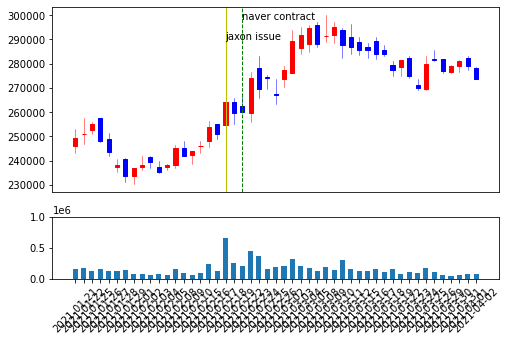

In [24]:
from matplotlib.gridspec import GridSpec
fig=plt.figure(figsize=(8,5))
gs=GridSpec(2,1,height_ratios=[3,1])
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[1,0],sharex=ax1) # x 축 공유
ax1.get_xaxis().set_visible(False) # 가운데 x 축 삭제
candlestick_ohlc(ax1,canohlc,width=0.5, colorup='r', colordown='b')
svol=df['svol'].values # vol
sx=df['sday'].values # x 축
ax2.bar(sx,svol,width=0.6)
ax2.set_ylim(0,1000000)
#ax1.set_xlim(0,20)
#ax1.set_ylim(100000,210000)
ax1.axvline(x=20, color='g', linestyle='--', linewidth=1)
ax1.text(20,298000,'naver contract')
ax1.axvline(x=18, color='y', linestyle='-', linewidth=1)
ax1.text(18,290000,'jaxon issue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
cdf['shortpos']=np.where(cdf['mvshort'])